<a href="https://colab.research.google.com/github/camigutie/DS4002-Project1/blob/main/SCRIPTS/basic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!git clone https://github.com/camigutie/DS4002-Project1.git

fatal: destination path 'DS4002-Project1' already exists and is not an empty directory.


In [1]:
import numpy as np
import pandas as pd

# 1) Import and Clean Data

In [3]:
# Read in phishing email data in the parquet
df = pd.read_csv('../DATA/raw.csv')

In [4]:
# Keep only email text and email type columns
df = df[['Email Text', 'Email Type']]

In [5]:
# Confirm columns were dropped
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
# Check if all NA have been dropped
df.isna().sum()

Email Text    0
Email Type    0
dtype: int64

# 2) EDA

In [7]:
# Dataframe Information
print(df.info())
print(df.isnull().sum())

# Summary Statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18634 entries, 0 to 18633
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18634 non-null  object
dtypes: object(2)
memory usage: 291.3+ KB
None
Email Text    0
Email Type    0
dtype: int64
       Email Text  Email Type
count       18634       18634
unique      17537           2
top         empty  Safe Email
freq          533       11322


## 2.1) Distribution of Email Types

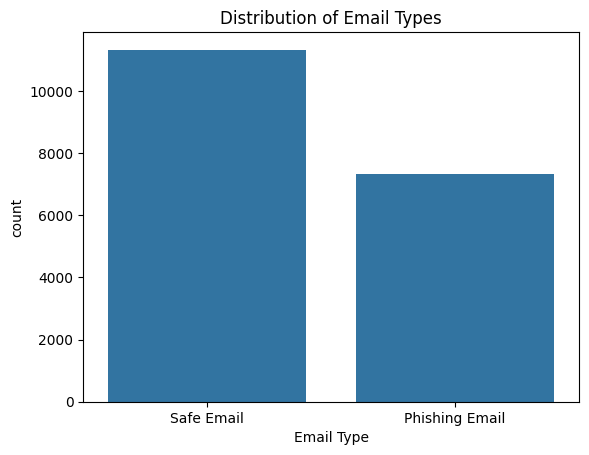

<Figure size 640x480 with 0 Axes>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target Variable Distribution
sns.countplot(x='Email Type', data=df)
plt.title('Distribution of Email Types')
plt.show()
plt.savefig("../OUTPUT/email_dist.png")

## 2.2) Email Text Length By Email Type

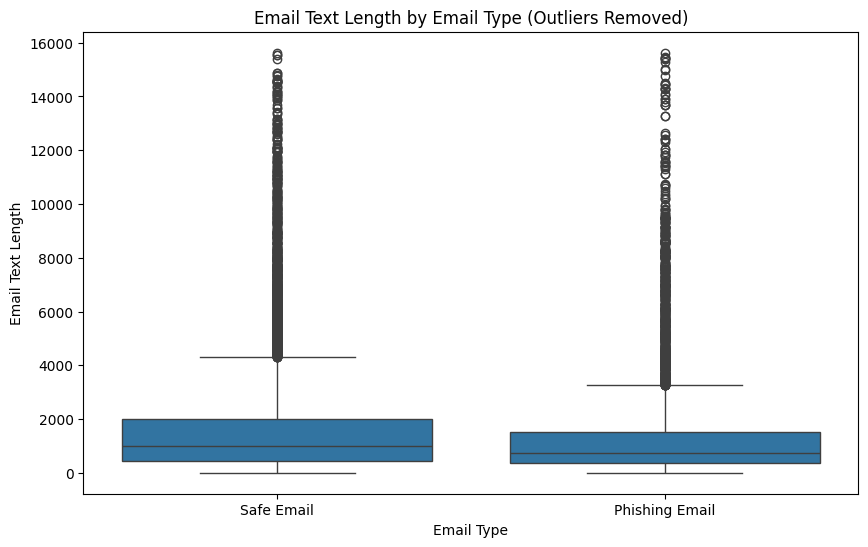

                  count         mean          std  min     25%    50%     75%  \
Email Type                                                                      
Phishing Email   7234.0  1393.868261  1964.598642  5.0  351.25  727.5  1517.0   
Safe Email      11209.0  1647.547685  2043.917372  5.0  439.00  982.0  1988.0   

                    max  
Email Type               
Phishing Email  15617.0  
Safe Email      15628.0  


<Figure size 640x480 with 0 Axes>

In [9]:
# Calculate Email Text Length
df['email_text_length'] = df['Email Text'].str.len()

# Remove outliers (e.g., top and bottom 1%)
lower_bound = df['email_text_length'].quantile(0.01)
upper_bound = df['email_text_length'].quantile(0.99)
df_filtered = df[(df['email_text_length'] >= lower_bound) & (df['email_text_length'] <= upper_bound)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Email Type', y='email_text_length', data=df_filtered)
plt.title('Email Text Length by Email Type (Outliers Removed)')
plt.xlabel('Email Type')
plt.ylabel('Email Text Length')
plt.show()

# Descriptive statistics for email text length by email type.
print(df_filtered.groupby('Email Type')['email_text_length'].describe())
plt.savefig("../OUTPUT/email_length.png")

## 2.3) Wordclouds of Most Common Words

In [10]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/willmayer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/willmayer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from collections import Counter

phishing_emails = df[df['Email Type'] == 'Phishing Email']['Email Text']
safe_emails = df[df['Email Type'] == 'Safe Email']['Email Text']

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove punctuation and non-alphanumeric characters
    words = [word for word in tokens if word.isalnum()]
    # Remove stopwords (common words lacking meaning)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Process phishing emails
all_phishing_words = []
for email in phishing_emails:
    all_phishing_words.extend(preprocess_text(email))

# Process safe emails
all_safe_words = []
for email in safe_emails:
    all_safe_words.extend(preprocess_text(email))

# Count word frequencies
phishing_word_counts = Counter(all_phishing_words)
safe_word_counts = Counter(all_safe_words)

# Get the top 30 most common words
most_common_phishing = phishing_word_counts.most_common(30)
most_common_safe = safe_word_counts.most_common(30)

print("Most common words in phishing emails:")
for word, count in most_common_phishing:
    print(f"{word}: {count}")

print("\nMost common words in safe emails:")
for word, count in most_common_safe:
    print(f"{word}: {count}")

Most common words in phishing emails:
â: 7647
email: 5308
http: 4852
1: 4524
free: 4382
2: 3975
com: 3942
3: 3938
get: 3886
company: 3885
please: 3875
information: 3846
money: 3796
one: 3582
business: 3579
us: 3279
time: 3188
5: 3128
e: 3119
report: 3107
new: 3035
click: 3008
20: 2775
make: 2744
order: 2692
mail: 2595
000: 2539
may: 2529
people: 2505
00: 2471

Most common words in safe emails:
enron: 19273
university: 17182
language: 16844
http: 16017
1: 13631
one: 11432
subject: 11042
ect: 11002
2: 11000
would: 10963
information: 10820
new: 10346
please: 9931
00: 9313
3: 8950
linguistics: 8923
e: 8473
also: 8440
10: 8415
conference: 7986
may: 7698
de: 7457
20: 7102
com: 7056
5: 6972
30: 6916
like: 6892
papers: 6891
time: 6671
english: 6636


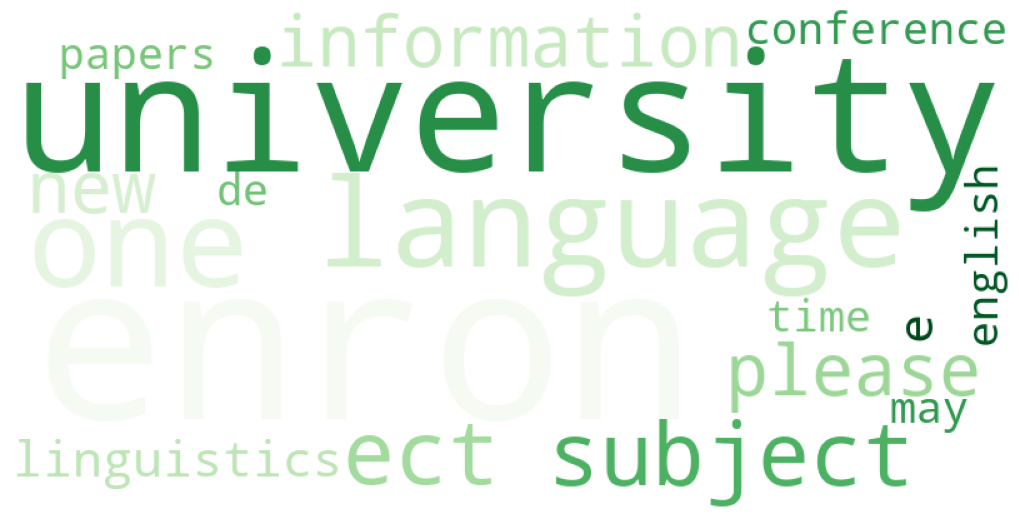

<Figure size 640x480 with 0 Axes>

In [12]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of the most common words in safe emails
safe_words_string = ' '.join([word for word, count in most_common_safe])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens_r').generate(safe_words_string)

# Display image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("../OUTPUT/safe_wordcloud.png")

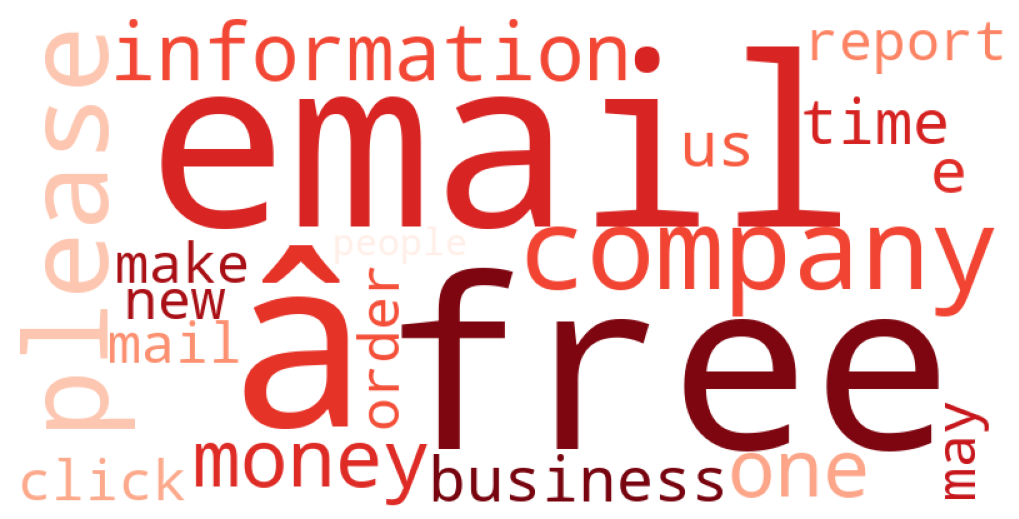

<Figure size 640x480 with 0 Axes>

In [13]:
# Create a string of the most common words in phishing emails
safe_words_string = ' '.join([word for word, count in most_common_phishing])

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds_r').generate(safe_words_string)

# Display image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("../OUTPUT/phishing_wordcloud.png")